### Classification Trees

For this example, we will be using the Iris dataset. 

It contains the measurements of 150 Iris flowers from three different species — Setosa, Versicolor, and Virginica. 
These will be our targets. 

Our goal is to predict which category an Iris flower belongs to. The petal length and width in centimeters are stored as columns, which we also call the features of the dataset.


In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, [2,3]]
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [5]:
y = iris.target
y[47:52]

array([0, 0, 0, 1, 1])

Using `scikit-learn`, train a decision tree with a maximum depth of 4.

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

We set the criterion as `entropy`. 
This criterion is known as the impurity measure. In classification, entropy is the most common impurity measure or splitting criteria.

The entropy is 0 if all samples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution.


For a more visual understanding of entropy, let’s plot the impurity index for the probability range [0, 1] for class 1.


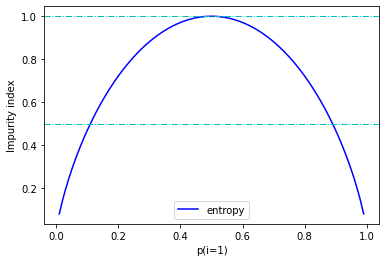

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

x = np.arange(0.0, 1.0, 0.01)   #dummy data
e = [entropy(p) if p != 0 else None for p in x]

plt.plot(x, e, label='entropy', color='b')   #plot impurity indices

for y in [0.5, 1.0]:
    plt.axhline(y=y, linewidth=1, color='c', linestyle='-.')
    
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.legend()
plt.show()



As you can see, entropy is 0 if `p(i=1|t) = 1`. If the classes are distributed uniformly with `p(i=1|t) = 0.5`, entropy is 1.


Now, returning to Iris, we will visualize our trained classification tree and see how entropy decides each split.

A nice feature in `scikit-learn` is that it allows us to export the decision tree as a `.dot` file after training, which we can visualize using `GraphViz`, for example. 

In addition to GraphViz, we will use also `pydotplus`, which has capabilities similar to GraphViz and allows us to convert `.dot` data files into a `decision tree image file`.


In [8]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data =  export_graphviz(tree, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal_width'],
                           out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')


True

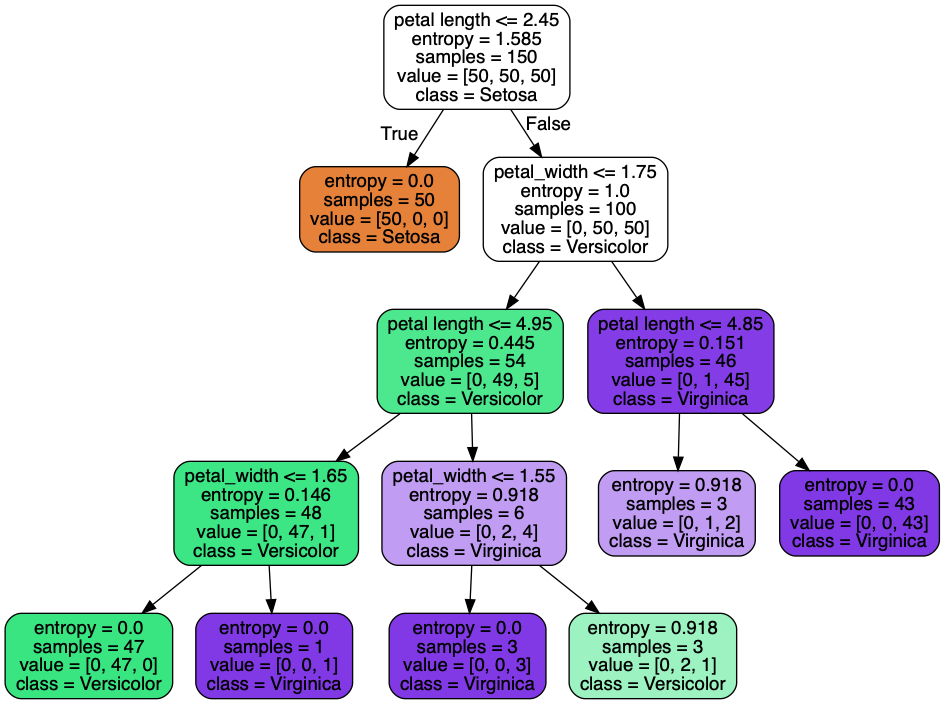